In [157]:
%pip install xlrd openpyxl --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
from scipy.stats import mannwhitneyu
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
#PRETEST DATA
#graphicnovel condition
pretest_graphicnovel = pd.read_excel("mainData/pretest_graphicnovel_40.xlsx")
print(pretest_graphicnovel.shape)
#textonly condition
pretest_textonly = pd.read_excel("mainData/pretest_textonly_40.xlsx")
print(pretest_textonly.shape)

(40, 21)
(40, 21)


In [160]:
#POSTEST DATA
#graphicnovel condition
postest_graphicnovel = pd.read_excel("mainData/postest_graphicnovel_40.xlsx")
print(postest_graphicnovel.shape)
#textonly condition
postest_textonly = pd.read_excel("mainData/postest_textonly_40.xlsx")
print(postest_textonly.shape)


(40, 238)
(40, 149)


In [161]:
def set_prolificID_pre(df):
    df.columns.values[6] = 'prolific_ID'
    # Set 'prolific_ID' column as the index
    df.set_index('prolific_ID', inplace=True)
    return df

def initial_cleanup(df):
    #set Prolific ID as index
    df.columns.values[7] = 'prolific_ID'
    df.set_index('prolific_ID', inplace=True)
    #remove NaN columns (feedback and points)
    df = df.dropna(axis=1, how='all')
    return df


#set prolific id as index
#pretest
pretest_graphicnovel = set_prolificID_pre(pretest_graphicnovel)
pretest_textonly = set_prolificID_pre(pretest_textonly)
#postest
postest_graphicnovel = initial_cleanup(postest_graphicnovel)
postest_textonly = initial_cleanup(postest_textonly)

In [162]:
#gn
# Find indexes that are only in pretest
only_in_pretest_gn = pretest_graphicnovel.index.difference(postest_graphicnovel.index)
# Find indexes that are only in postest
only_in_postest_gn = postest_graphicnovel.index.difference(pretest_graphicnovel.index)
print("Indexes only in pretest gn:", only_in_pretest_gn)
print("Indexes only in postest gn:", only_in_postest_gn)


#to
# Find indexes that are only in pretest
only_in_pretest_to = pretest_textonly.index.difference(postest_textonly.index)
# Find indexes that are only in postest
only_in_postest_to = postest_textonly.index.difference(pretest_textonly.index)
print("Indexes only in pretest to:", only_in_pretest_to)
print("Indexes only in postest to:", only_in_postest_to)


Indexes only in pretest gn: Index([], dtype='object', name='prolific_ID')
Indexes only in postest gn: Index([], dtype='object', name='prolific_ID')
Indexes only in pretest to: Index([], dtype='object', name='prolific_ID')
Indexes only in postest to: Index([], dtype='object', name='prolific_ID')


In [163]:
def checkAttention(df):
    #no one failed the mark "Strongly agree" -> check other 2 
    attention = ["What is Lucy's name?", "Who is Lucy?2"]
    answer = {"What is Lucy's name?": "Lucy", "Who is Lucy?2": "A person" }
    all_wrong = []
    for a in attention:
        df[a]
        # Get indices where the answer is not "Lucy"
        wrong_indices = df[df[a] != answer[a]].index.to_list()
        # Display the indices
        all_wrong.append(wrong_indices)
    # Find the intersection
    failed_2 = list(set(all_wrong[0]).intersection(set(all_wrong[1])))
    return failed_2


failed2_gn = checkAttention(postest_graphicnovel)
failed2_to = checkAttention(postest_textonly)
print("graphic novel failed checks:", failed2_gn)
print("text only failed checks:", failed2_to)

#graphic novel
pretest_graphicnovel = pretest_graphicnovel.drop(index=failed2_gn)
postest_graphicnovel = postest_graphicnovel.drop(index=failed2_gn)
print(pretest_graphicnovel.shape)
print(postest_graphicnovel.shape)
#textonly
pretest_textonly = pretest_textonly.drop(index=failed2_to)
postest_textonly = postest_textonly.drop(index=failed2_to)
print(pretest_textonly.shape)
print(postest_textonly.shape)

graphic novel failed checks: ['5ece75528f582a08555e0a3e', '5c35d8eb7cca44000102ad54', '5db35c6cd14d3d000a07f3f6']
text only failed checks: ['5ec66c4259d924047b9c413a']
(37, 20)
(37, 97)
(39, 20)
(39, 70)


REMOVE UNNECESSARY COLUMNS 

In [164]:
#only keep relevant columns
keep = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
pretest_gn = pretest_graphicnovel.iloc[:, keep]
pretest_to = pretest_textonly.iloc[:, keep]
#rename relevant columns
new_columns = ["age", "gender", "native_language","years_education", "cefr_level", "percentage", "TV/movies", "music/podcasts", "pleasure_reading", "academic_reading", "friends/family", "emails/messages", "social", "news/magazines"]
pretest_gn.columns = new_columns
pretest_to.columns = new_columns


In [165]:
#create combined df with column group
pretest_gn['group'] = 'Graphic Novel'
pretest_to['group'] = 'Text Only'
df_combined = pd.concat([pretest_gn, pretest_to])

PLOT GENDER (CATEGORICAL)

In [166]:
gender_group_counts = df_combined.groupby(['group', 'gender']).size().unstack(fill_value=0)
print(gender_group_counts)
# Compute percentages
gender_group_percentages = gender_group_counts.div(gender_group_counts.sum(axis=1), axis=0) * 100

# Display the percentage DataFrame
print(gender_group_percentages)

gender         Female  Male
group                      
Graphic Novel      15    22
Text Only          17    22
gender            Female       Male
group                              
Graphic Novel  40.540541  59.459459
Text Only      43.589744  56.410256


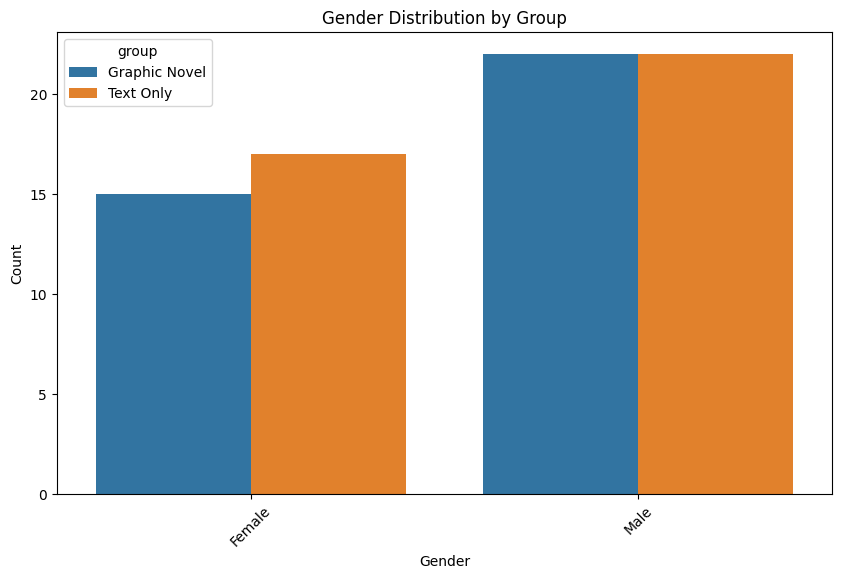

<Figure size 640x480 with 0 Axes>

In [167]:
# Example: Bar plot for language distribution by group
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='group', data=df_combined)
plt.title('Gender Distribution by Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plots/pretest/Gender Distribution by Group')

CLEAN LANGUAGES

In [168]:
pretest_gn["native_language"] = pretest_gn["native_language"].str.lower()
print(pretest_gn["native_language"].unique())

pretest_to["native_language"] = pretest_to["native_language"].str.lower()
pretest_to["native_language"].unique()

#fix different ways of writing same language
language_mapping = {
    'greece': 'greek',
    'polish language': 'polish',
    'GREEK': 'greek',
    'Italian': 'italian',
    'hungary': 'hungarian'
}

# Apply the mapping to standardize language names
pretest_gn['native_language'] = pretest_gn['native_language'].replace(language_mapping)
# Apply the mapping to standardize language names
pretest_to['native_language'] = pretest_to['native_language'].replace(language_mapping)
# Print the updated DataFrame to verify changes
print(pretest_to['native_language'].unique())

['polish' 'spanish' 'portuguese' 'greek' 'italian' 'turkish' 'french'
 'latvian' 'estonian' 'hungarian' 'german' 'russian' 'dutch']
['spanish' 'estonian' 'italian' 'czech' 'polish' 'romanian ' 'greek'
 'hungarian' 'portuguese' 'chinese' 'german ' 'russian' 'dutch'
 'slovenian' 'german']


PLOT LANGUAGE (CATEGORICAL)

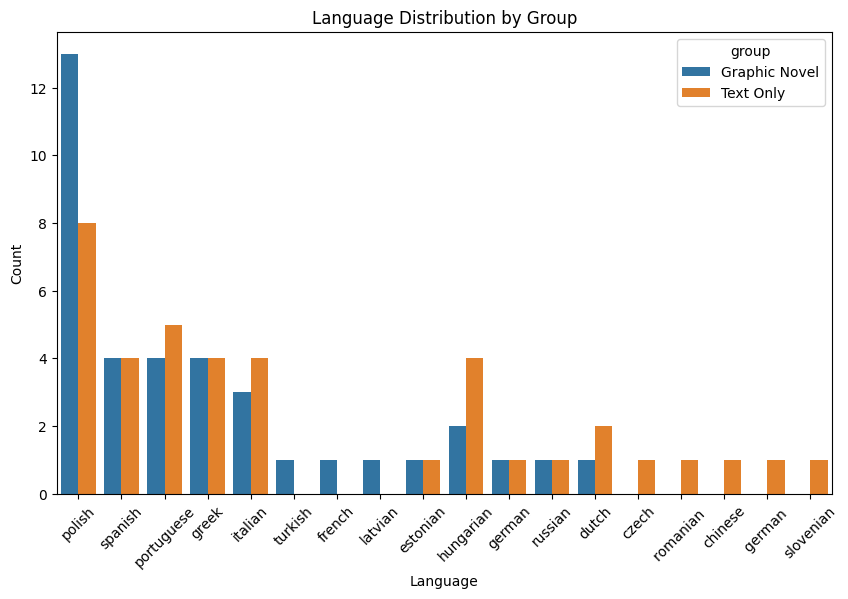

<Figure size 640x480 with 0 Axes>

In [169]:
df_combined = pd.concat([pretest_gn, pretest_to])
# Example: Bar plot for language distribution by group
plt.figure(figsize=(10, 6))
sns.countplot(x='native_language', hue='group', data=df_combined)
plt.title('Language Distribution by Group')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plots/pretest/Language Distribution by Group')

SIMPLIFY CONTENT OF CEFR ANSWERS

In [170]:
#simplify  cefr level column
# Define a function to conditionally replace 'cefr_level'
def simplify_cefr(level):
    if 'B1' in level:
        return 'B1'
    elif 'B2'  in level:
        return 'B2'
    elif 'C1' in level:
        return 'C1'
    elif 'C2' in level:
        return 'C2'
    elif 'A1' in level:
        return 'A1'
    elif 'A2' in level:
        return 'A2'
    else:
        return level  # Return unchanged if none of the conditions match

# Apply the function to 'cefr_level' column
pretest_gn['cefr_level'] = pretest_gn['cefr_level'].apply(simplify_cefr)
pretest_to['cefr_level'] = pretest_to['cefr_level'].apply(simplify_cefr)
df_combined = pd.concat([pretest_gn, pretest_to])

PLOT CEFR LEVEL

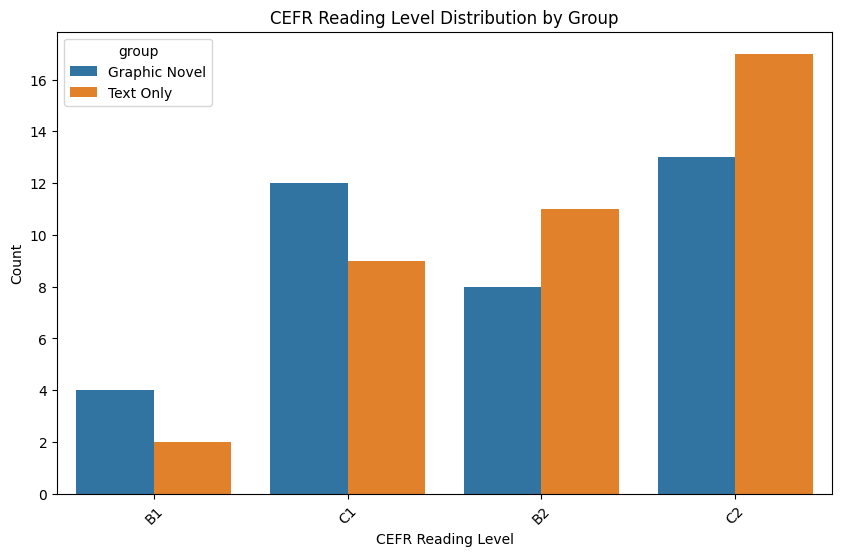

<Figure size 640x480 with 0 Axes>

In [171]:
# Example: Bar plot for language distribution by group
plt.figure(figsize=(10, 6))
sns.countplot(x='cefr_level', hue='group', data=df_combined)
plt.title('CEFR Reading Level Distribution by Group')
plt.xlabel('CEFR Reading Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plots/pretest/CEFR Distribution by Group')

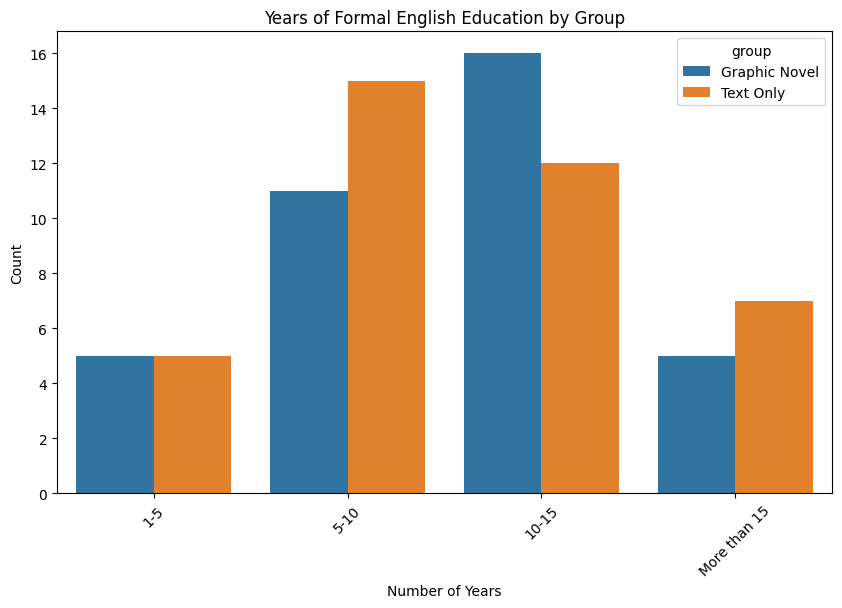

In [172]:
# Example: Bar plot for language distribution by group
plt.figure(figsize=(10, 6))
# Define the order of x-axis categories
order = ['1-5','5-10', '10-15','More than 15']
sns.countplot(x='years_education', hue='group', data=df_combined, order = order)
plt.title('Years of Formal English Education by Group')
plt.xlabel('Number of Years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

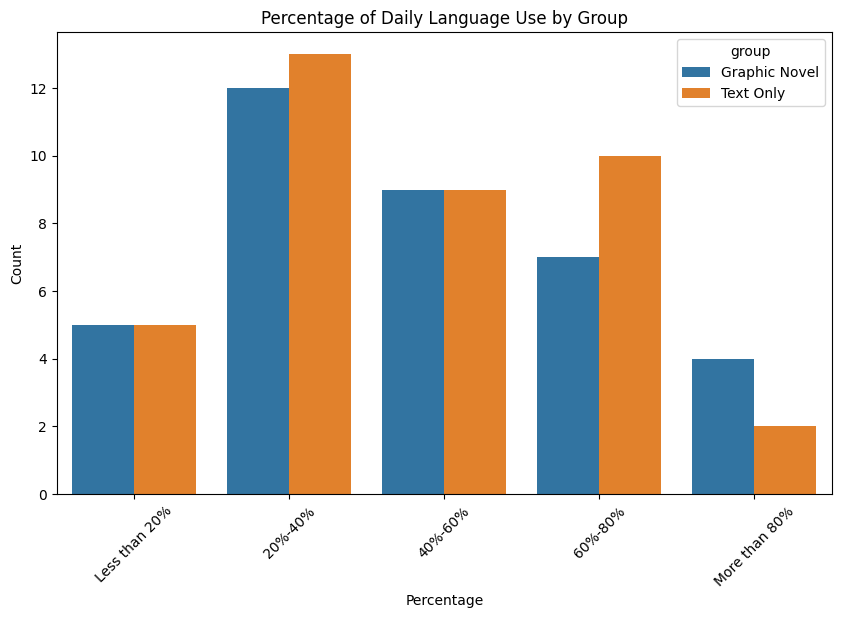

In [173]:

# Example: Bar plot for language distribution by group
plt.figure(figsize=(10, 6))
# Define the order of x-axis categories

order = ['Less than 20%', '20%-40%', '40%-60%',  '60%-80%', 'More than 80%']
sns.countplot(x='percentage', hue='group', data=df_combined, order=order)
plt.title('Percentage of Daily Language Use by Group')
plt.xlabel('Percentage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


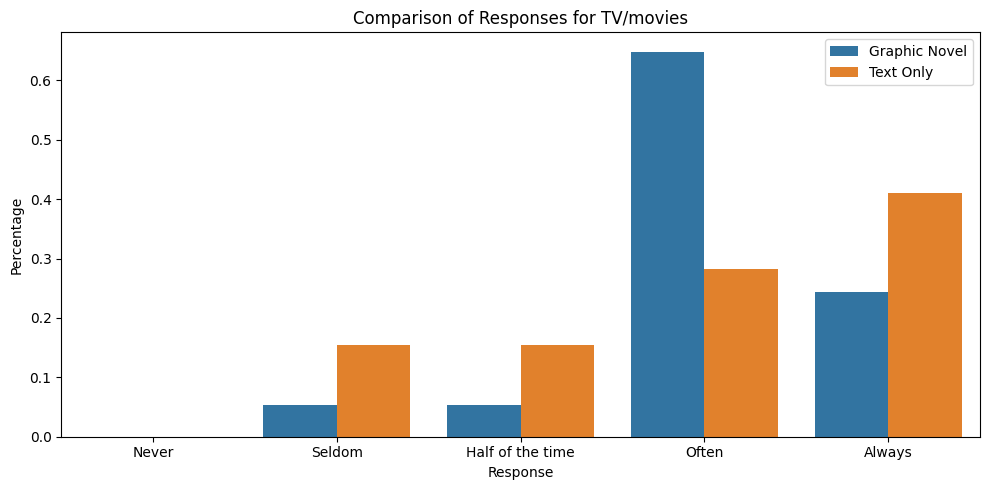

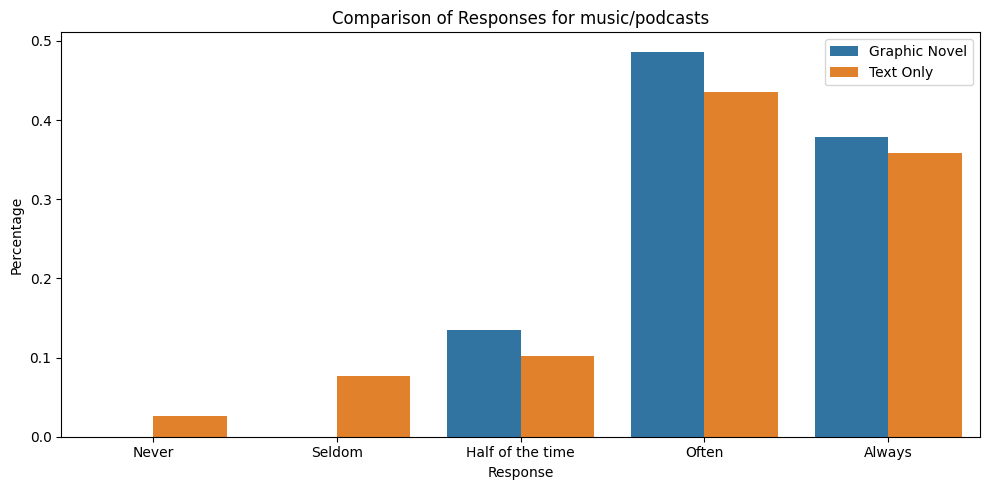

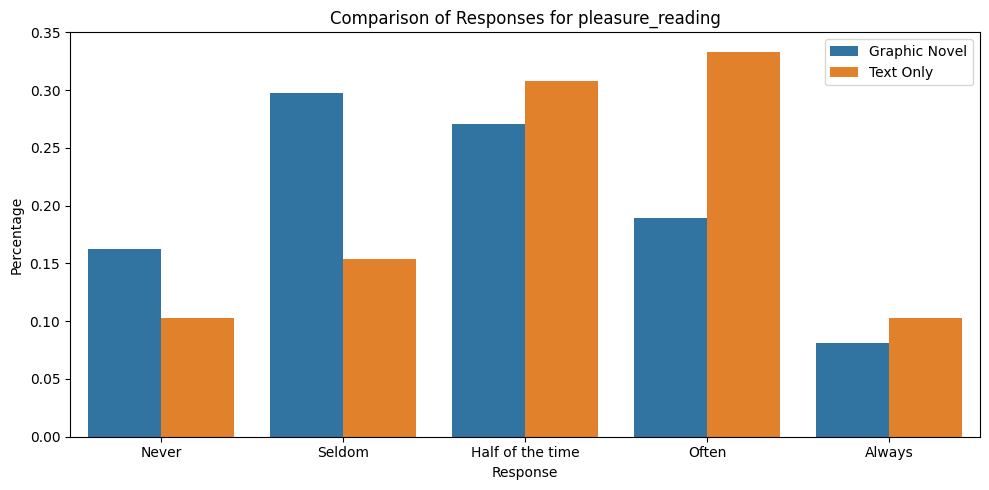

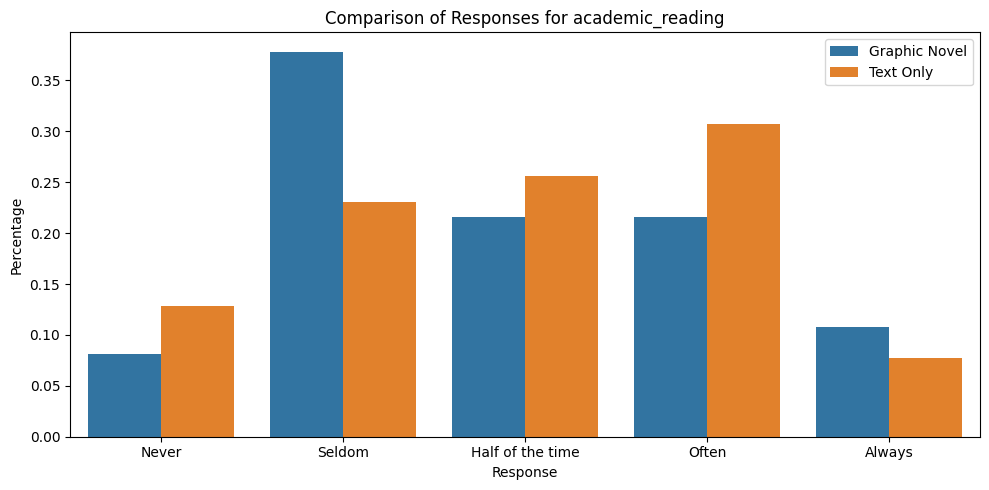

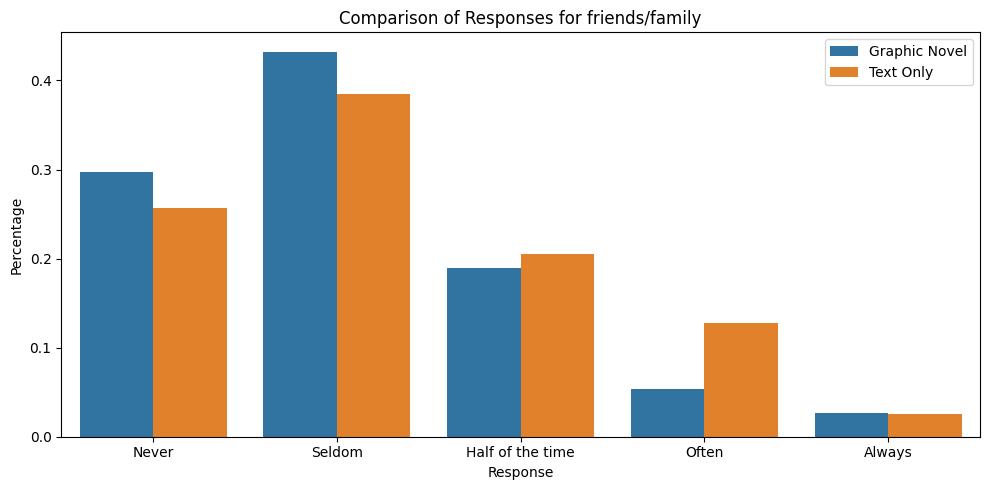

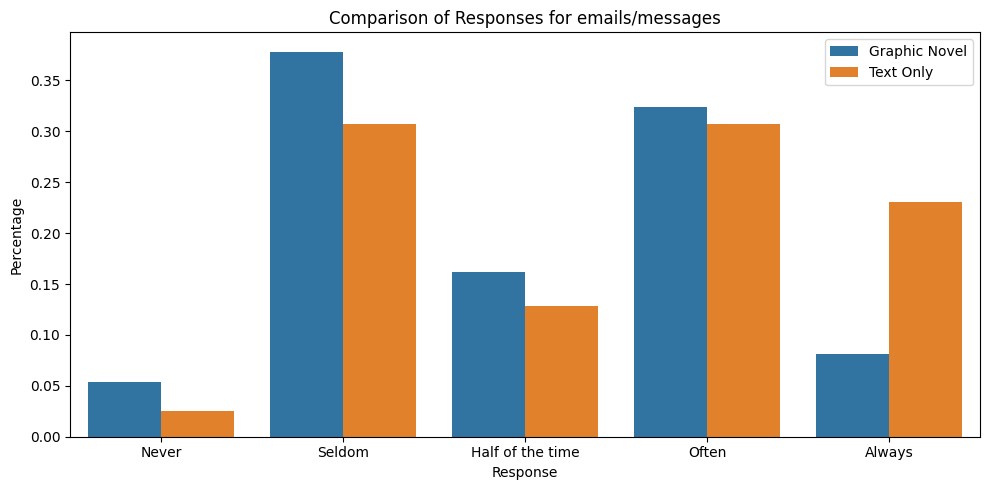

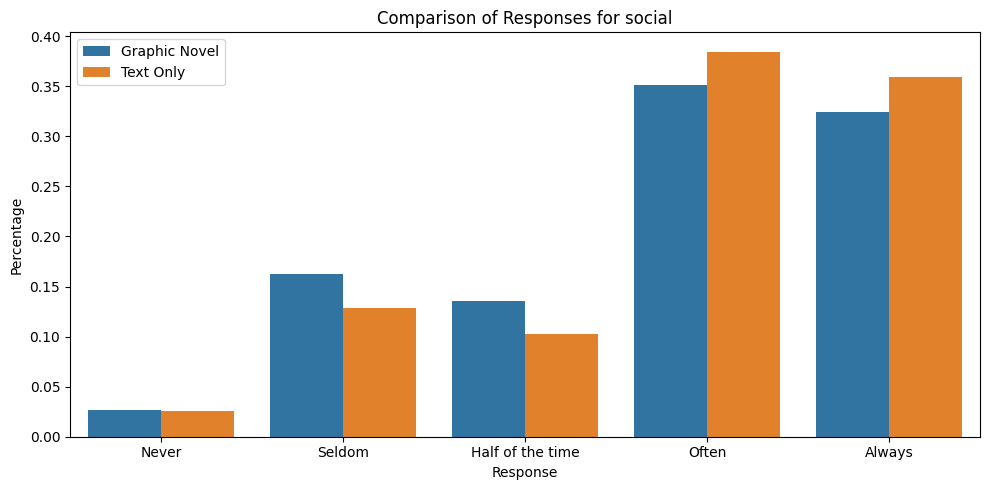

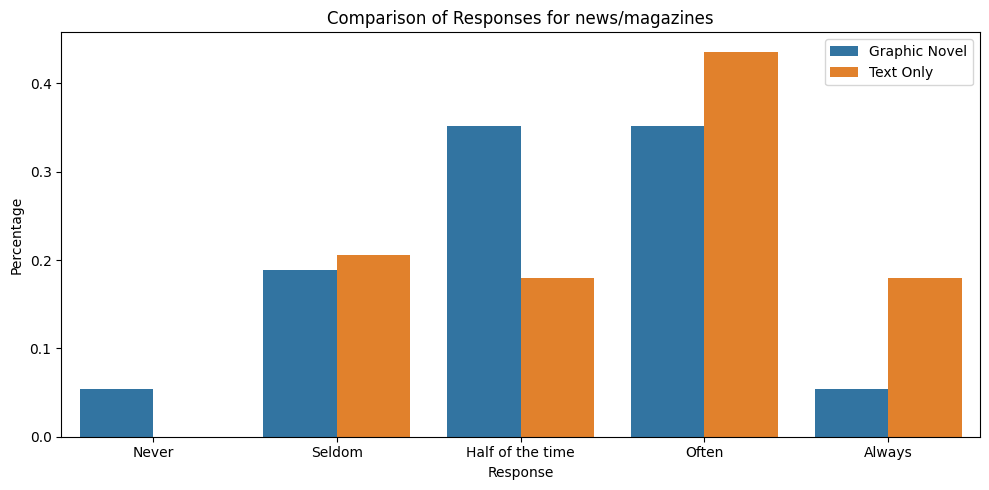

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data_for_comparing(df_group1, df_group2):
    df_group1_melted = df_group1.melt(var_name='Question', value_name='Response')
    df_group2_melted = df_group2.melt(var_name='Question', value_name='Response')
    
    response_counts_group1 = df_group1_melted.groupby(['Question', 'Response']).size().unstack().fillna(0)
    response_counts_group2 = df_group2_melted.groupby(['Question', 'Response']).size().unstack().fillna(0)
    
    # Normalize to get percentages
    response_counts_group1 = response_counts_group1.apply(lambda x: x / x.sum(), axis=1)
    response_counts_group2 = response_counts_group2.apply(lambda x: x / x.sum(), axis=1)
    
    # Define the correct order of questions
    original_col = df_group1.columns.tolist()  # Assuming both groups have the same order of questions
    
    # Reindex response_counts to match the original order of questions
    response_counts_group1 = response_counts_group1.reindex(original_col)
    response_counts_group2 = response_counts_group2.reindex(original_col)
    
    return response_counts_group1, response_counts_group2

def plot_comparative_bar_seaborn(response_counts_group1, response_counts_group2):
    response_labels = ['Never', 'Seldom', 'Half of the time', 'Often', 'Always']
    
    for question in response_counts_group1.index:
        fig, ax = plt.subplots(figsize=(10, 5))
        
        # Ensure all response labels are present
        group1_means = response_counts_group1.loc[question].reindex(response_labels).fillna(0)
        group2_means = response_counts_group2.loc[question].reindex(response_labels).fillna(0)
        
        data = pd.DataFrame({
            'Response': response_labels * 2,
            'Percentage': list(group1_means) + list(group2_means),
            'Group': ['Graphic Novel'] * len(response_labels) + ['Text Only'] * len(response_labels)
        })
        
        sns.barplot(x='Response', y='Percentage', hue='Group', data=data, ax=ax)
        
        ax.set_xlabel('Response')
        ax.set_ylabel('Percentage')
        ax.set_title(f'Comparison of Responses for {question}')
        ax.legend()
        
        plt.tight_layout()
        plt.show()

# Assuming you have your two dataframes, df_group1 and df_group2
response_counts_group1, response_counts_group2 = prepare_data_for_comparing(pretest_gn.iloc[:, -9:-1], pretest_to.iloc[:, -9:-1])
plot_comparative_bar_seaborn(response_counts_group1, response_counts_group2)


ENCODE ANSWERS THROUGH MAPPING

In [175]:
#create mappings categorical2numerical
years_mapping = {'Less than 1': 1, '1-5':2, '5-10':3, '10-15':4, 'More than 15':5 }
cefr_mapping = {
    'A1': 1, 
    'A2': 2, 
    'B1': 3, 
    'B2': 4,
    'C1': 5, 
    'C2': 6}
percentage_mapping = {'Less than 20%': 1, '20%-40%': 2, '40%-60%': 3, '60%-80%': 4, 'More than 80%': 5}
frequency_mapping = {'Never': 1, 'Seldom': 2, 'Half of the time': 3, 'Often': 4, 'Always': 5}


# Apply the mappings
for pretest in [pretest_gn, pretest_to]:
    for column in pretest.columns[-12:]:
        if column == "years_education":
            mapping = years_mapping
        elif column == 'cefr_level':
            mapping = cefr_mapping
        elif  column == 'percentage':
            mapping = percentage_mapping
        else:
            mapping = frequency_mapping
        
        pretest.loc[:, column] = pretest[column].replace(mapping).apply(pd.to_numeric, errors='coerce')


PLOT LIKERT SCALE

In [176]:
#Transform the data for plotting
def prepare_data_for_plotting(df):
    df_melted = df.melt(var_name='Question', value_name='Response')
    response_counts = df_melted.groupby(['Question', 'Response']).size().unstack().fillna(0)
    response_counts = response_counts.apply(lambda x: x / x.sum(), axis=1)  # Normalize to get percentages
    # Define the correct order of questions
    original_col = df.columns.tolist()  # Assuming this is the correct order of questions
    # Reindex response_counts to match the original order of questions
    response_counts = response_counts.reindex(original_col[::-1])
    return response_counts
#call function on df

# Plot the Data
def plot_likert_stacked(response_counts):
    # Define the color palette with custom colors
    colors = ['#d73027', '#fc8d59', '#d9d9d9', '#91bfdb', '#4575b4']
    response_labels = ['Never', 'Seldom', 'Half of the time', 'Often', 'Always']
    
    fig, ax = plt.subplots(figsize=(10,5))

    # Plot each response category
    bottom = None
    for i, response in enumerate(response_counts.columns):
        if bottom is None:
            ax.barh(response_counts.index, response_counts[response], color=colors[i], label=response_labels[i])
            bottom = response_counts[response]
        else:
            ax.barh(response_counts.index, response_counts[response], left=bottom, color=colors[i], label=response_labels[i])
            bottom += response_counts[response]
    
    
    # Add legend and labels
    ax.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xlabel('Percentage')
    ax.set_title('Frequency of English Activities')
    
    plt.tight_layout()
    plt.show()




graphic novel

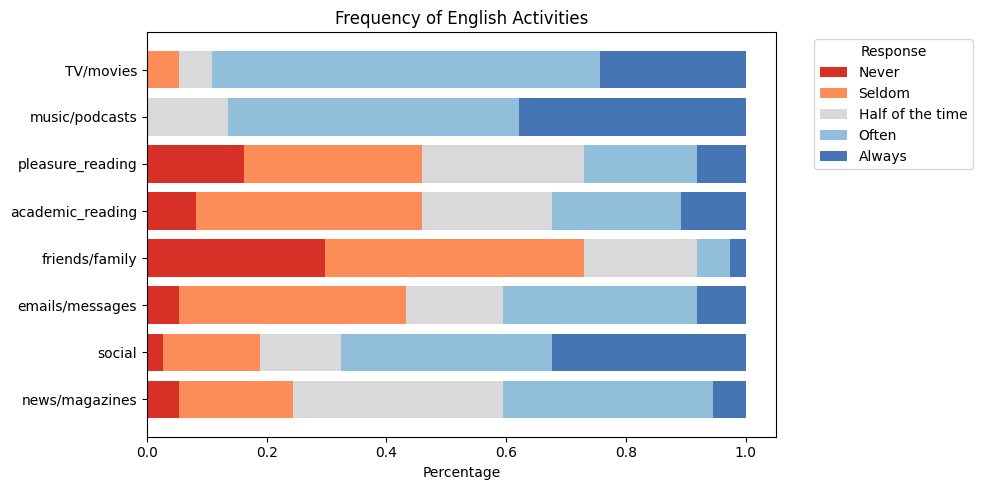

In [177]:
#gn
df_likert_gn = pretest_gn.iloc[:, -9:-1]
prepared_gn = prepare_data_for_plotting(df_likert_gn)
plot_likert_stacked(prepared_gn)

text only

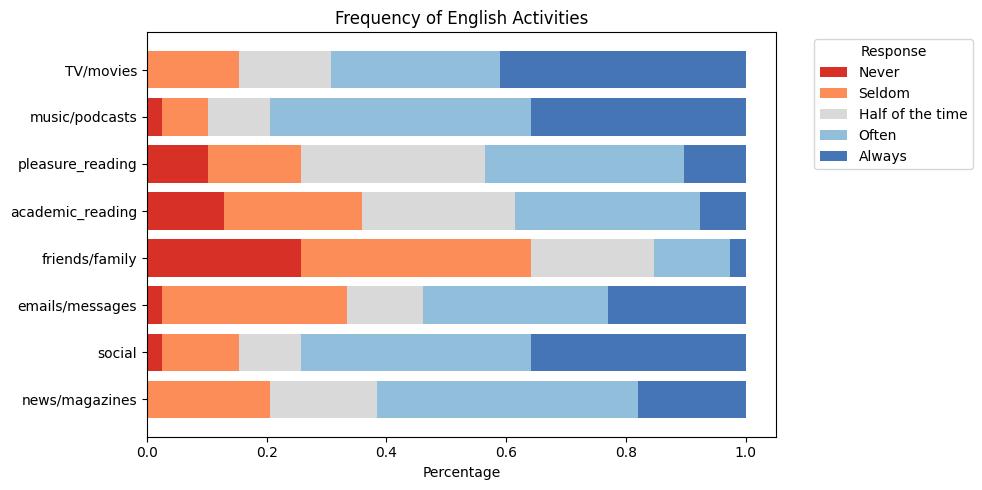

In [178]:

#to
df_likert_to = pretest_to.iloc[:, -9:-1]
prepared_to = prepare_data_for_plotting(df_likert_to)
plot_likert_stacked(prepared_to)


In [179]:
'''
# Save DataFrames to excel file
pretest_gn.to_excel('pretest_gn_clean.xlsx', index=True)
# Save DataFrames to excel file
pretest_to.to_excel('pretest_to_clean.xlsx', index = True)
'''

"\n# Save DataFrames to excel file\npretest_gn.to_excel('pretest_gn_clean.xlsx', index=True)\n# Save DataFrames to excel file\npretest_to.to_excel('pretest_to_clean.xlsx', index = True)\n"

CHECK SIGNIFICANCE

In [180]:
def checkSignificance(df1, df2):
    #list to save significantly different columns
    different_columns_ttest = []
    #item by item
    for column in df1.columns:
        if column == "group":
            continue
        print(column)
        #run Levene's test
        w_stat, p_value = stats.levene(df1[column].to_list(), df2[column].to_list())
        print("Levene's:", w_stat, p_value)
        if p_value > 0.05:
            #run ANOVA only if Leven's is not significant
            t_stat, t_p_value = stats.ttest_ind(df1[column].to_list(), df2[column].tolist(), equal_var=True)
            print(f"T-test:", t_stat, t_p_value)
            if t_p_value < 0.05:
                print("Significant difference in ", column,  "(T-TEST)")
                different_columns_ttest.append(column)
            #else, if not significant do not print anything
        else:
            print("You cannot run ANOVA/t-test for", column, "(leven's p-value: ", p_value, ")")

        #Run Mann-Whitney U test
        statistic, p_value = mannwhitneyu(df1[column].tolist(), df2[column].tolist(), alternative='two-sided')
        print("Mann-Whitney U test:", statistic, p_value)
        if p_value < 0.05:
            print("Significant difference in ", column, "(MANN WHITNEY)")
        #else:
            #print("no significant difference in ", column)
        print("\n")
        
    return different_columns_ttest
    



In [181]:
#calculate the average of the last eight columns
different_columns = checkSignificance(pretest_gn.iloc[:, 3:], pretest_to.iloc[: , 3:])
print(different_columns)


years_education
Levene's: 0.31337105636621604 0.5773095201015506
T-test: 0.13770109741718092 0.8908506506586777
Mann-Whitney U test: 743.5 0.814198890536919


cefr_level
Levene's: 0.07892990151703855 0.7795368746801453
T-test: -0.5820749705241293 0.5622854024766826
Mann-Whitney U test: 670.5 0.5804281466756891


percentage
Levene's: 0.10900549406799923 0.7422120974372393
T-test: 0.15387076332465266 0.8781304954153125
Mann-Whitney U test: 729.0 0.9401040286522343


TV/movies
Levene's: 10.438596283598601 0.0018427068020671785
You cannot run ANOVA/t-test for TV/movies (leven's p-value:  0.0018427068020671785 )
Mann-Whitney U test: 723.0 0.9910824103980225


music/podcasts
Levene's: 1.5199173535358028 0.2215342760966307
T-test: 1.0920591616369733 0.27834981722804253
Mann-Whitney U test: 775.0 0.5504028192979227


pleasure_reading
Levene's: 0.20789171019054675 0.6497601656948326
T-test: -1.6771504376385813 0.09773262705748552
Mann-Whitney U test: 559.5 0.08399839574778652


academic_reading

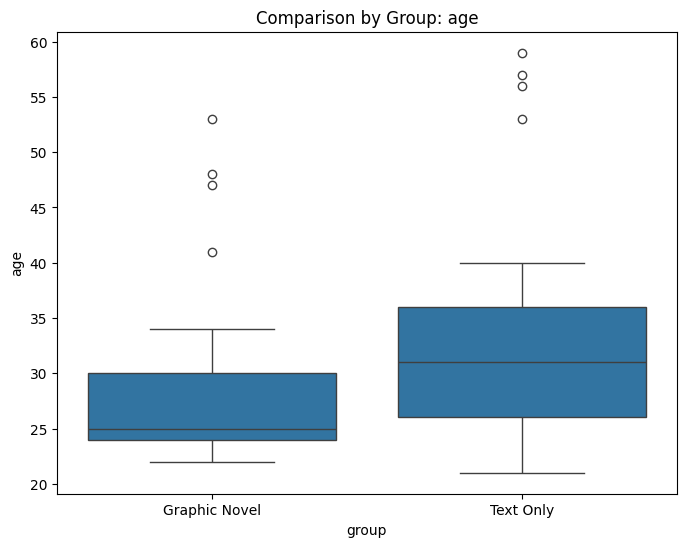

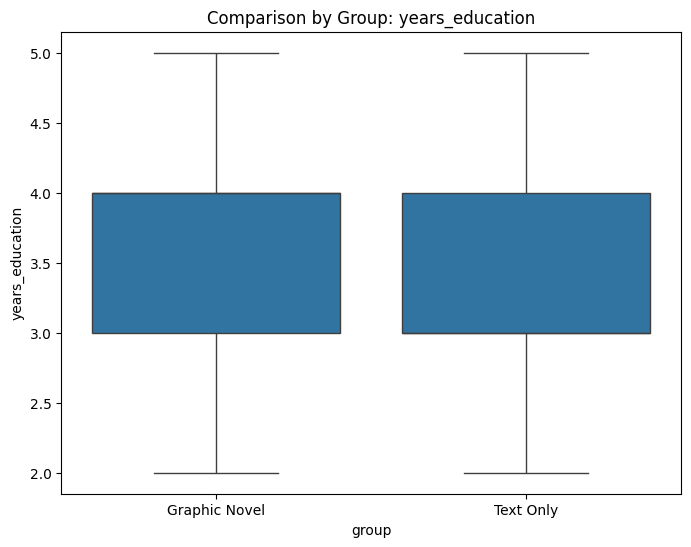

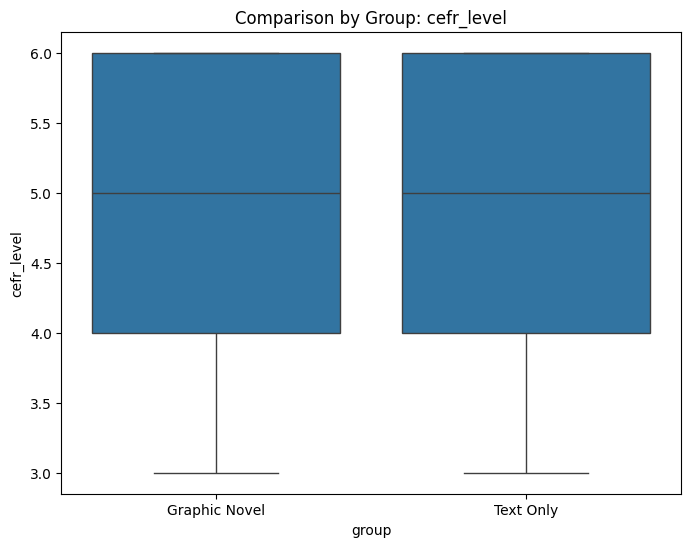

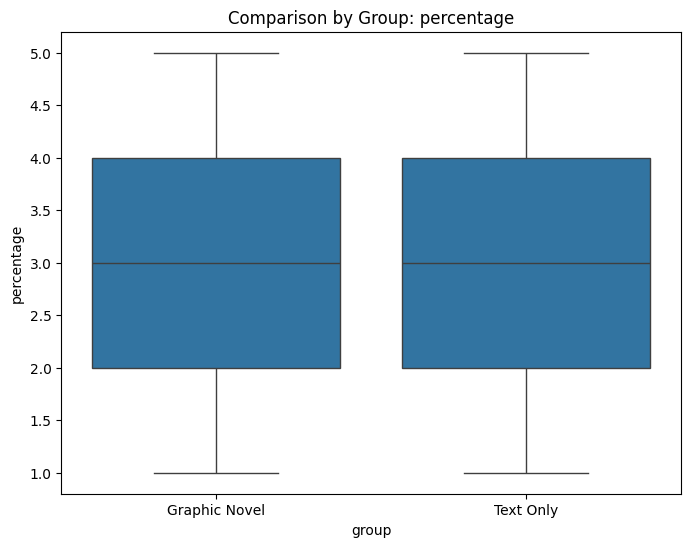

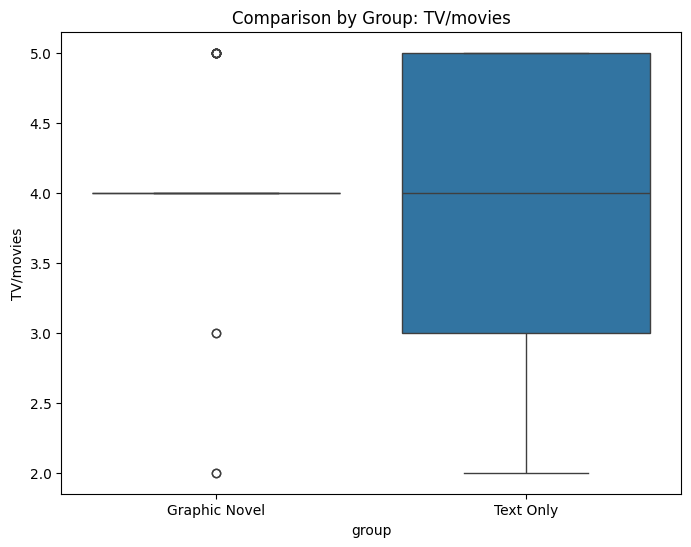

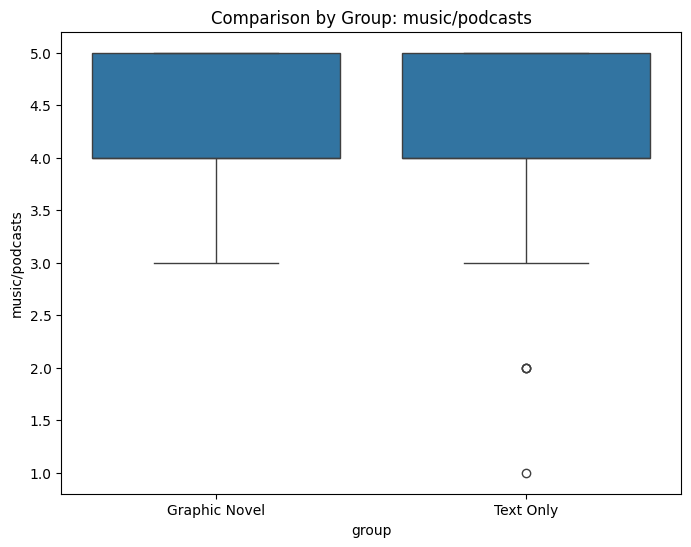

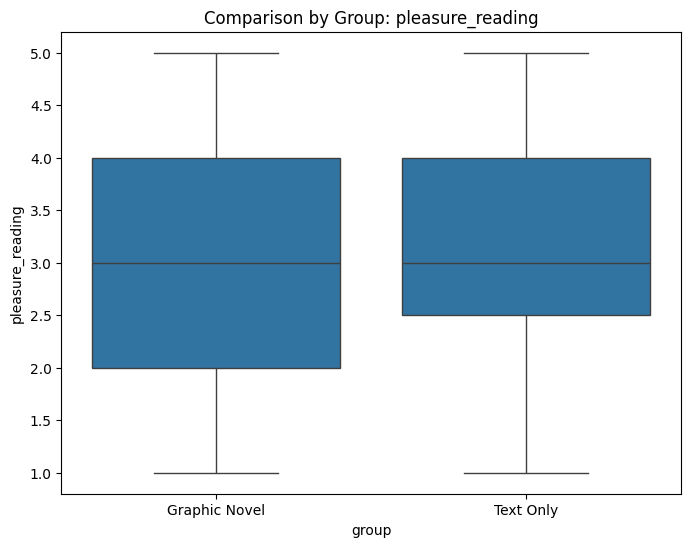

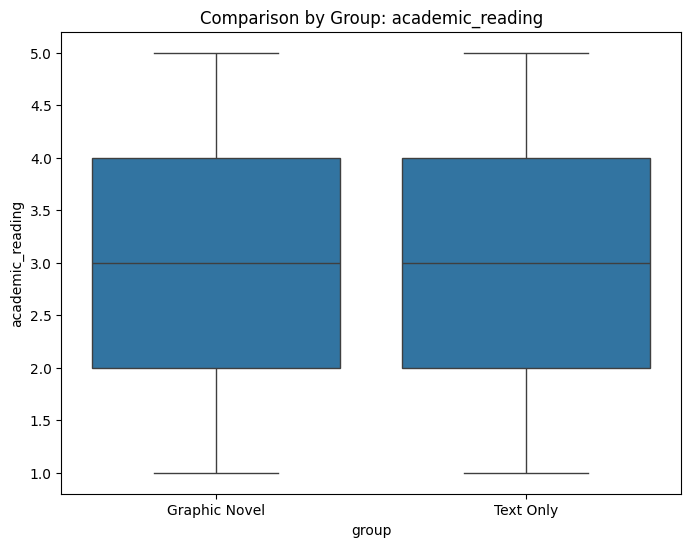

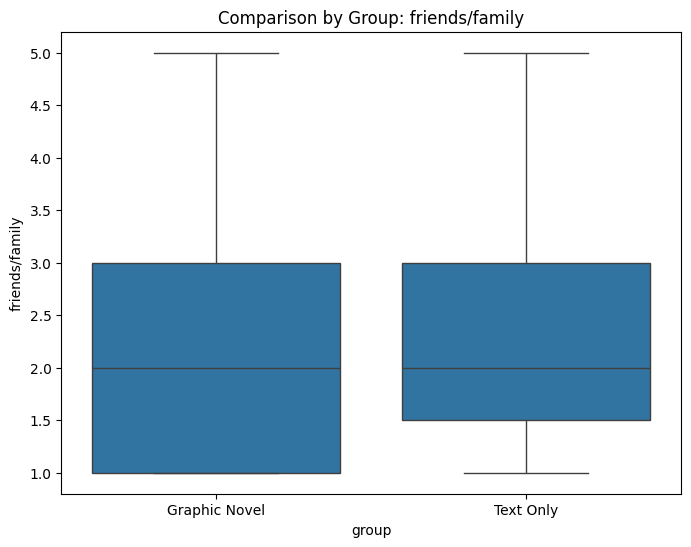

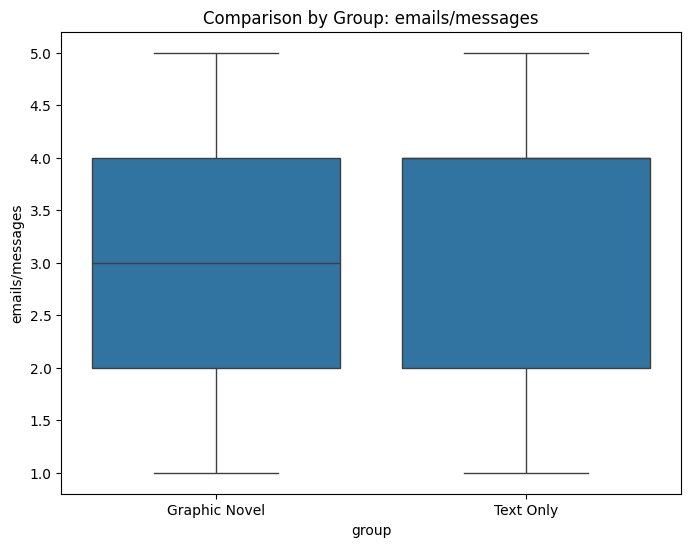

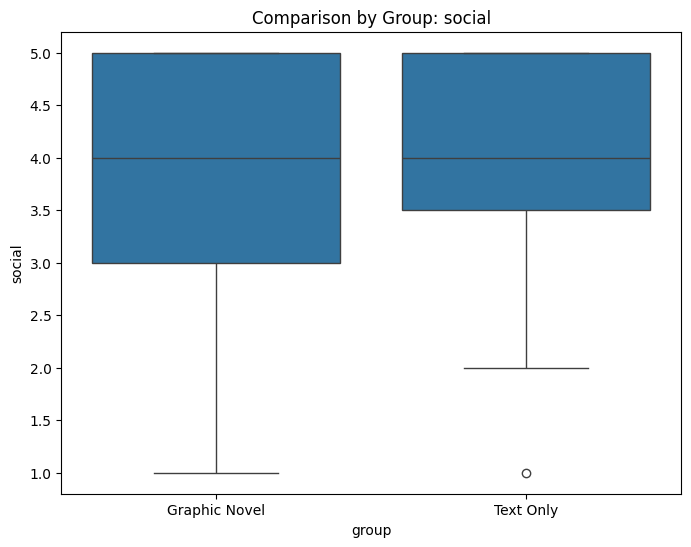

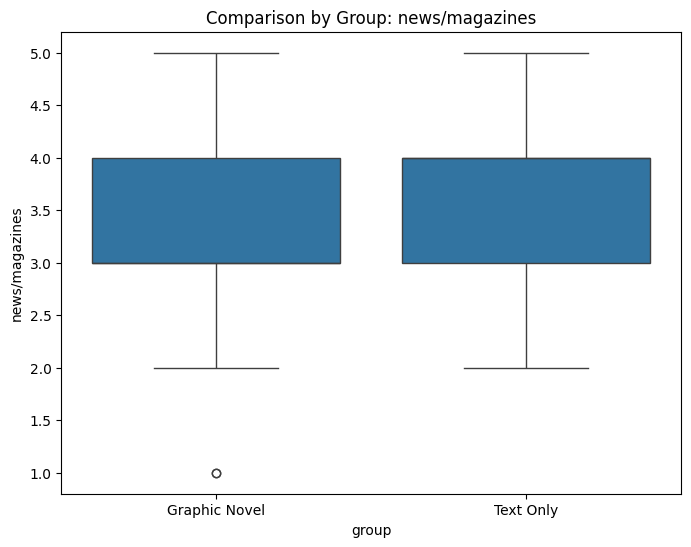

In [182]:
# Add 'group' column to each DataFrame
pretest_gn_copy = pretest_gn.copy()
pretest_to_copy = pretest_to.copy()
pretest_gn_copy['group'] = 'Graphic Novel'
pretest_to_copy['group'] = 'Text Only'

combined_likert = pd.concat([pretest_gn_copy, pretest_to_copy])
# List of columns to plot
# Loop through the columns and create box plots
for column in combined_likert.columns:
    if column in ["gender", "native_language", "group"]:
            continue
    else: 
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='group', y=column, data=combined_likert)
        plt.title(f'Comparison by Group: {column}')
        plt.show()

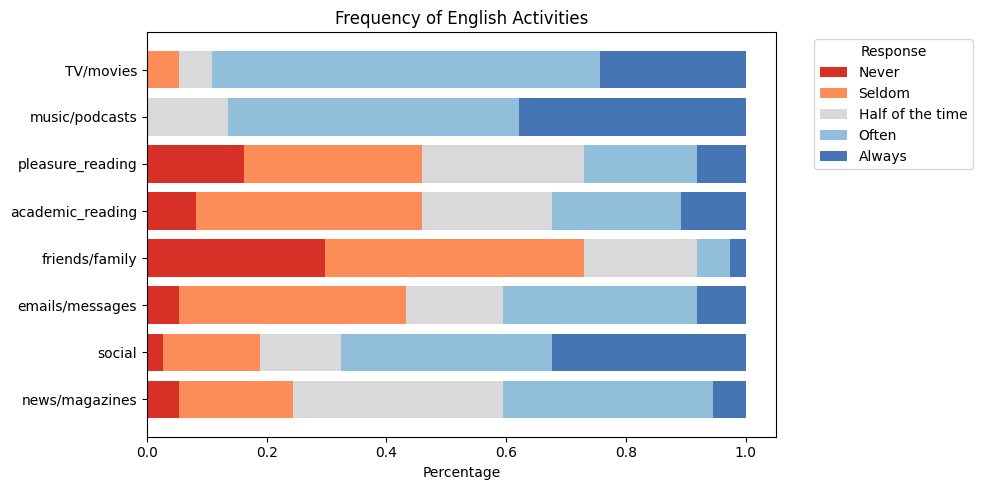

In [183]:
df_likert_gn_balanced = pretest_gn.iloc[:, 6:]
prepared_gn_balanced = prepare_data_for_plotting(df_likert_gn_balanced)
plot_likert_stacked(prepared_gn_balanced)



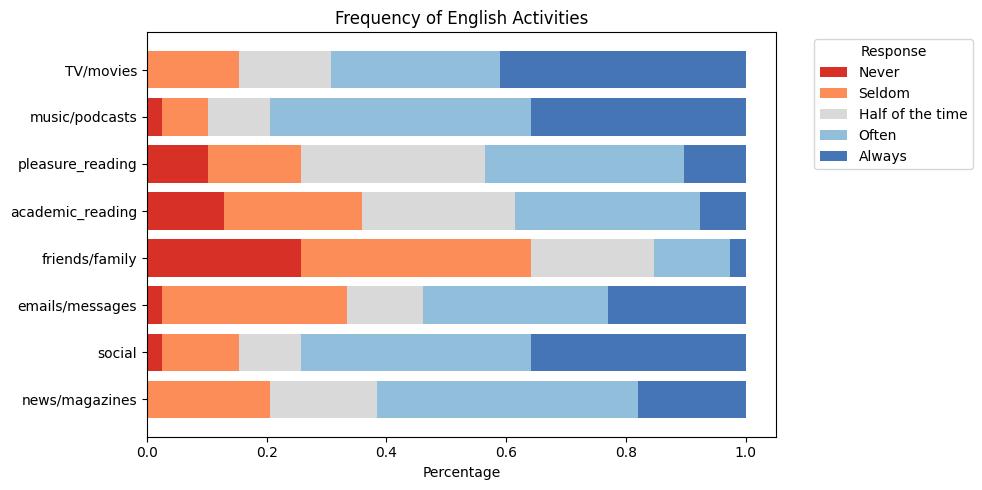

In [184]:
df_likert_to_balanced = pretest_to.iloc[:, 6:]
prepared_to_balanced = prepare_data_for_plotting(df_likert_to_balanced)
plot_likert_stacked(prepared_to_balanced)

In [185]:
print(pretest_gn.shape)
print(pretest_to.shape)
# Save DataFrames to excel file
pretest_gn.to_excel('pretest_gn_clean_40.xlsx', index=True)
# Save DataFrames to excel file
pretest_to.to_excel('pretest_to_clean_40.xlsx', index = True)

(37, 15)
(39, 15)


FROM HERE IT'S ALL TO BALANCE DATA -> NOT USED ATM


import itertools
def perform_ttests(df1, df2, feature_columns):
    results = {}
    for feature in feature_columns:
        t_stat, p_value = stats.ttest_ind(df1[feature].to_list(), df2[feature].to_list())
        results[feature] = (t_stat, p_value)
    return results

def find_rows_to_remove(df1, df2, feature_columns, alpha):
    indices1 = df1.index.tolist()
    indices2 = df2.index.tolist()

    # Iterate through combinations of rows
    for r in range(1, min(len(indices1), len(indices2)) + 1):
        for combo1 in itertools.combinations(indices1, r):
            for combo2 in itertools.combinations(indices2, r):
                temp_df1 = df1.drop(index=list(combo1))
                temp_df2 = df2.drop(index=list(combo2))
                
                # Perform t-tests on all features
                test_results = perform_ttests(temp_df1, temp_df2, feature_columns)
                
                # Check if all p-values are non-significant
                all_non_significant = all(p > alpha for _, p in test_results.values())
                
                if all_non_significant:
                    return list(combo1), list(combo2), test_results
    
    return None, None, None

alphas = [0.08]
combos = []
for alpha in alphas:
    print(alpha)
    rows_to_remove_gn, rows_to_remove_to, final_results = find_rows_to_remove(pretest_gn, pretest_to, different_columns, alpha)

    if rows_to_remove_gn and rows_to_remove_to:
        print("Rows to remove from GN:", rows_to_remove_gn)
        print("Rows to remove from TO:", rows_to_remove_to)
        print("Final t-test results after removing rows:", final_results)
        combos.append((rows_to_remove_gn, rows_to_remove_to))
    else:
        print("No combination found that eliminates significant differences.")

        
#RMEOVE FIRST COMBO    
# gn
combo_2_rows_gn = combos[0][0]
pretest_gn_008 = pretest_gn.drop(index = combo_2_rows_gn)
print(pretest_gn_008.shape)
#to
combo_2_rows_to = combos[0][1]
pretest_to_008 = pretest_to.drop(index = combo_2_rows_to)
print(pretest_to_008.shape)

#recheck significance after removal
different_columns = checkSignificance(pretest_gn_008.iloc[:, 3:], pretest_to_008.iloc[: , 3:])
print(different_columns)

if different_columns == []:
    pretest_gn_balanced = pretest_gn_008
    pretest_to_balanced = pretest_to_008
    # Save DataFrames to excel file
    '''
    pretest_gn_balanced.to_excel('pretest_gn_balanced.xlsx', index=True)
    pretest_to_balanced.to_excel('pretest_to_balanced.xlsx', index = True)
    '''
    print("first combo worked")
else:
    print("try next combo!")
    # gn
    combo_3_rows_gn = combos[1][0]
    pretest_gn_01 = pretest_gn.drop(index = combo_3_rows_gn)
    print(pretest_gn_01.shape)
    #to
    combo_3_rows_to = combos[1][1]
    pretest_to_01 = pretest_to.drop(index = combo_3_rows_to)
    print(pretest_to_01.shape)

    #recheck significance with 2 rows removed
    different_columns = checkSignificance(pretest_gn_01.iloc[:, 3:], pretest_to_01.iloc[: , 3:])
    print(different_columns)
    if different_columns == []:
        pretest_gn_balanced = pretest_gn_01
        pretest_to_balanced = pretest_to_01
        # Save DataFrames to excel file
        '''
        pretest_gn_balanced.to_excel('pretest_gn_balanced.xlsx', index=True)
        pretest_to_balanced.to_excel('pretest_to_balanced.xlsx', index = True)
        '''
        print("second combo worked")
    else:
        print("both didnt work -> run function again with different numbers")

#merge balanced dfs   
# Add 'group' column to each DataFrame
pretest_gn_balanced['group'] = 'Graphic Novel'
pretest_to_balanced['group'] = 'Text Only'

df_combined_balanced = pd.concat([pretest_gn_balanced, pretest_to_balanced])

# Compute counts of males and females within each group
gender_group_counts_01 = df_combined_balanced.groupby(['group', 'gender']).size().unstack(fill_value=0)
print(gender_group_counts_01)
# Compute percentages
gender_group_percentages_01 = gender_group_counts_01.div(gender_group_counts_01.sum(axis=1), axis=0) * 100

# Display the percentage DataFrame
print(gender_group_percentages_01)

# Example: Bar plot for language distribution by group
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='group', data=df_combined_balanced)
plt.title('Gender Distribution by Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plots/pretest/Gender Distribution by Group')

# Example: Bar plot for language distribution by group
plt.figure(figsize=(10, 6))
sns.countplot(x='native_language', hue='group', data=df_combined_balanced)
plt.title('Language Distribution by Group')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plots/pretest/Language Distribution by Group')


plt.figure(figsize=(10, 6))
ax = sns.countplot(x='cefr_level', hue='group', data=df_combined_balanced)
plt.title('CEFR Reading Level Distribution by Group')
plt.xlabel('CEFR Reading Level')
plt.ylabel('Count')

# Customizing x-axis labels
cefr_labels = {1:'A1', 2:'A2',3: 'B1', 4: 'B2', 5: 'C1', 6: 'C2'}
ax.set_xticklabels([cefr_labels[int(label.get_text())] for label in ax.get_xticklabels()])

plt.xticks(rotation=45)
plt.show()




plt.figure(figsize=(10, 6))
ax = sns.countplot(x='years_education', hue='group', data=df_combined_balanced)
plt.title('Years of Formal English Education by Group')
plt.xlabel('Number of Years')
plt.ylabel('Count')

# Customizing x-axis labels
years_labels = {1:'Less than 1', 2: '1-5', 3: '5-10', 4: '10-15', 5: 'More than 15'}
ax.set_xticklabels([years_labels[int(label.get_text())] for label in ax.get_xticklabels()])

plt.xticks(rotation=45)
plt.show()




plt.figure(figsize=(10, 6))
ax = sns.countplot(x='percentage', hue='group', data=df_combined_balanced)
plt.title('Percentage of Daily Language Use by Group')
plt.xlabel('Percentage')
plt.ylabel('Count')

# Customizing x-axis labels
years_labels = {1:'Less than 20%', 2: '20%-40%', 3: '40%-60%', 4: '60%-80%', 5: 'More than 80%'}
ax.set_xticklabels([years_labels[int(label.get_text())] for label in ax.get_xticklabels()])

plt.xticks(rotation=45)
plt.show()



df_likert_gn_balanced = pretest_gn_balanced.iloc[:, 6:-2]
prepared_gn_balanced = prepare_data_for_plotting(df_likert_gn_balanced)
plot_likert_stacked(prepared_gn_balanced)

#to
df_likert_to_balanced = pretest_to_balanced.iloc[:, 6:-2]
prepared_to_balanced = prepare_data_for_plotting(df_likert_to_balanced)
plot_likert_stacked(prepared_to_balanced)


df_likert_gn_balanced['group'] = "Graphic Novel"
df_likert_to_balanced['group'] = "Text Only"
combined_likert = pd.concat([df_likert_gn_balanced, df_likert_to_balanced])
for column in combined_likert.columns[:-1]:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, hue='group', data=combined_likert)
    plt.title(f'Frequency of English activity by group: {column}')
    plt.xlabel('Frequency')
    plt.ylabel('Count')

    # Customizing x-axis labels
    labels = {1:'Never', 2:'Seldom',3: 'Half of the time', 4: 'Often', 5: 'Always'}
    ax.set_xticklabels([labels[int(label.get_text())] for label in ax.get_xticklabels()])

    plt.xticks(rotation=45)
    plt.show()


# List of columns to plot
# Loop through the columns and create box plots
for column in df_combined_balanced.columns:
    if column in ["group", "gender", "native_language"]:
        continue
    else:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='group', y=column, data=df_combined_balanced)
        plt.title(f'Pretest Comparison by Group: {column}')
        plt.show()

#final shapes check
print(pretest_gn_balanced.shape)
print(pretest_to_balanced.shape)
print(df_combined_balanced.shape)